In [40]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal as ss

In [41]:
pkl_file = '/Users/zhengj10/Desktop/iGluSnFR_patch/Plate_2/FOV1/dFF_all_rois.pickle'

In [42]:
with open(pkl_file, 'rb') as handle:
    act_pixel_dict = pickle.load(handle)

1.4039233681312397
1.09620649198279
1.7269538375192888
1.487539850029189
2.2055840906097712
1.5640604467805512
0.8481435127242383
1.008177801226671
1.3883815322171498
0.7079419299743814
0.6619341907466182
1.1183240424384127
2.1820019279206506
0.9988532110091728
1.1004905604281254
0.8639019360751506
1.1518531845987758
1.5425950196592375
0.8046934140802413
1.0841590698903438
1.2935415563790353
0.9044368600682594
0.8326005025125629
0.34810269345578765
1.268769716088328
0.7989638539867802
1.1256258534365031
0.6989099479524714
0.6353040303328187
1.0903688886274039
0.5195027861123014
0.4271815913032456
0.6442662389735362
0.8052030456852785
1.7762047562591534
0.9112412705564312
0.42576188272625043
0.4743649826600436
1.0660100744304934
0.6132042862080892
1.6011823556161877
0.44396047023558594
0.41784478207309206
0.7987047370779204
0.6076411687458956
0.6226868245219694
0.6452225268930597
0.6011339177909607
1.2345098039215694
0.8693086003372674
0.9553196195531966
1.1194214147115864
1.80359249533

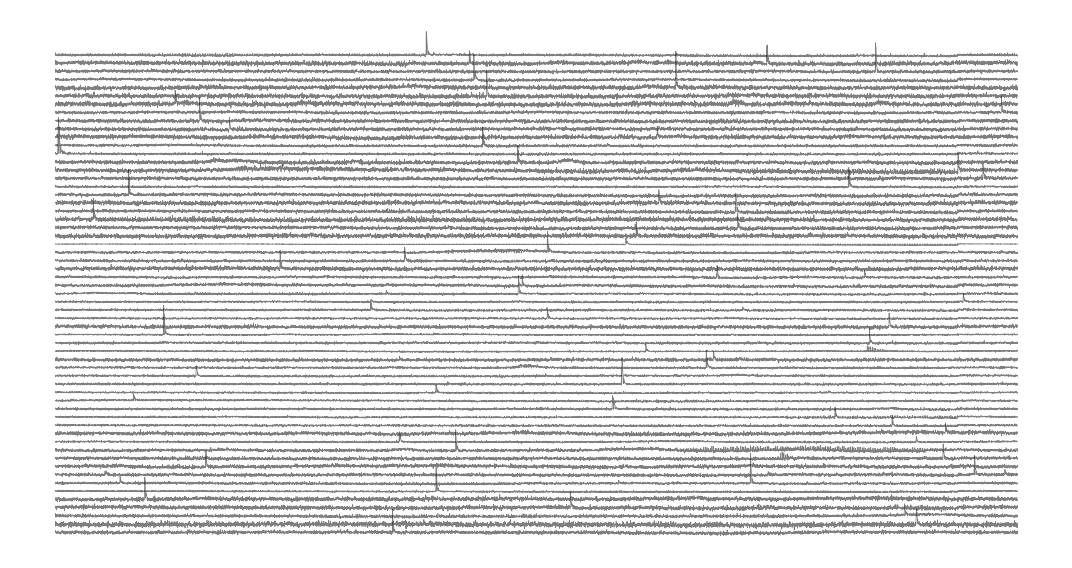

In [57]:
fig = plt.figure(figsize=[15,8])
x = np.arange(6400)
N = 2400
T = 1.0 / 100
i = 0
for k in range(len(act_pixel_dict)):
    y = act_pixel_dict[k]
    yf = scipy.fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

    if np.max(2.0/N * np.abs(yf[:N//2]))>0.2: # Remove bad ROIs with slow fluctuation
        continue
    
    peaks, _ = ss.find_peaks(y, height=0.3)
#     print(len(peaks))
    if len(peaks)<1 or len(peaks)>5:
        continue
#     if np.std(y)>0.1:
#         continue
    print(np.max(y))
    offset = 0.5*i
    plt.plot(x, y-offset, zorder=k+1, lw=0.75, alpha=0.5, color='k')

    plt.fill_between(x,y-offset,0-offset,zorder=k+1,facecolor='w',edgecolor='w',
                     lw=0,closed=True)
    plt.axis('off')
    i+=1
plt.tight_layout()
plt.show()


In [56]:
i

59